# Índices da Educação Brasileira no Ano de 2010

Integrantes: Guilherme Lorete Schmidt - 13676857 e Luana Hartmann Franco da Cruz - 13676350

# Introdução
No cenário contemporâneo, a análise estatística dos índices educacionais no Brasil desempenha um papel crucial na compreensão da qualidade e eficácia do sistema educacional do país. A educação é um dos pilares fundamentais para o desenvolvimento social, econômico e cultural de uma nação, influenciando diretamente a formação de cidadãos e o progresso coletivo. Portanto, examinar de forma sistemática e estatística os indicadores educacionais torna-se imperativo para identificar tendências, desafios e oportunidades de melhoria.

Neste contexto, a análise estatística proporciona uma abordagem objetiva e baseada em evidências para avaliar diversos aspectos do sistema educacional brasileiro, focando-se nesta análise no acesso à escola dentre diferentes grupos populacionais. Ao coletar, organizar e interpretar dados quantitativos e qualitativos, é possível identificar padrões, correlações e disparidades que ajudam a informar políticas públicas, direcionar investimentos e promover a equidade no acesso à educação.

Além disso, a análise estatística permite uma comparação longitudinal e transversal dos índices educacionais, possibilitando acompanhar o progresso ao longo do tempo e fazer comparações entre diferentes redes de ensino e grupos demográficos. Essa perspectiva ampla e detalhada é essencial para uma avaliação abrangente e contextualizada do sistema educacional brasileiro, fornecendo insights valiosos para a formulação de estratégias e intervenções eficazes.

Portanto, este estudo se propõe a realizar uma análise estatística dos principais índices da educação brasileira, buscando entender os desafios enfrentados, as conquistas alcançadas e as áreas prioritárias para investimento e aprimoramento. Ao examinar indicadores como taxa de alfabetização, taxa de escolarização, desempenho em avaliações nacionais e acesso à educação de qualidade, pretendemos contribuir para o debate público e para o desenvolvimento de políticas educacionais mais eficientes e inclusivas.

# Metodologia

## Base de Dados

A base de dados a ser analisada foi obtida a partir do website do Instituto Brasileiro de Geografia e Estatística (IBGE), principal entidade brasileira em estatísticas sociais e econômicas gerais do país. A base de dados está disponível através do link https://www.ibge.gov.br/estatisticas/sociais/educacao/9662-censo-demografico-2010.html?edicao=9753&t=resultados.

Tais dados foram coletados pelo Instituto no Censo Demográfico de 2010, com o objetivo de identificar as características do povo brasileiro e revelar como vivem através de uma amostragem probabilística da mesma. A coleta das informações foi conduzida, em geral, através de entrevista presencial entre recenseadores e moradores. Todos os dados coletados passaram, no momento da entrevista, pelo processo de crítica eletrônica, cuja finalidade era eliminar inconsistências entre as informações dos diversos quesitos do questionário provenientes de equívocos ou não respostas durante a fase da coleta.

Segundo informações disponibilizadas pelo IBGE, a amostra do Censo 2010 teve cinco frações diferentes usadas de acordo com o total da população do município. Nos municípios com até 2.500 habitantes, a fração amostral foi de 50%, ou seja, em metade do total de domicílios foi aplicado o questionário da amostra. Os que tinham mais de 2.500 até 8.000 habitantes, tiveram a fração amostral de 33%. Nos municípios com mais de 8.000 até 20.000 habitantes, a fração foi de 20%. Já nos que tinham mais de 20.000 até 500 mil habitantes, a fração foi de 10%. E, por fim, nos municípios com população maior que 500 mil, a fração foi de 5%.

Portanto, a partir da base de dados disponibilizada pelo IBGE em formato `.xls` e `.xlsx`, foram selecionados dados que permitam relacionar as variáveis `sexo`, `cor ou raça`, `frequência escolar`, `idade` e `renda`, de forma a obter-se um panorama geral do acesso ao ambiente escolar em relação a diferentes setores da população brasileira. Sendo assim, os dados foram analizados em grande parte através da biblioteca `pandas` e graficadas através da `matplotlib`, ambas nativas à linguagem de programação `Python`. Demais bibliotecas podem ser encontradas abaixo.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scp
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [45]:
# planilha censo demográfico 2010 educação por sexo, idade
tab1 = pd.read_excel('tab1_1_1.xlsx', skiprows=8)

# planilha censo demográfico 2010 educação por cor ou raça
tab2 = pd.read_excel('tab1_1_2.xlsx', skiprows=6)

# planilha censo demográfico 2010 educação por rendimento nominal per capita
tab3 = pd.read_excel('tab1_1_3.xlsx', skiprows=6)

# planilhas contendo dados similares contemplando diferentes regiões brasileiras
tab1_reg = [pd.read_excel('tab2_' + str(x) + '_1_1.xls', skiprows=7) for x in range(1, 6)]
tab2_reg = [pd.read_excel('tab2_' + str(x) + '_1_2.xls', skiprows=5) for x in range(1, 6)]
tab3_reg = [pd.read_excel('tab2_' + str(x) + '_1_3.xls', skiprows=5) for x in range(1, 6)]

## Definição de variáveis

Primeiramente, as variáveis devem ser devidamente identificadas e agrupadas de acordo com suas características, dividindo-se entre _qualitativas_, categorizando dados, ou _quantitativas_, quantificando dados. Ainda assim, _variáveis qualitativas_ podem ainda ser subdivididas entre _nominais_, quando trata de categorias sem ordem aparente entre elas, ou _ordinais_, se trata de categorias que possuem uma ordem. O mesmo vale para _variáveis quantitativas_, que podem ser subdividas entre _discretas_, quando tratam de valores individuais discretizados, e _continuas_, se caracterizam quantias que podem ser descritas de forma contínua.

A partir dessa descrição, detalham-se as variáveis para avaliação posterior:
- Sexo: traz as categorias de masculino e feminino;
- Cor ou Raça: dividide-se entre diversas categorias étnicas da população brasileira;
- Frequência escolar: descreve se um dado habitante frequenta, já fequentou, ou nunca frequentou o ambiente escolar;
- Idade: traz a idade (discretizada em anos) dos habitantes;
- Renda: traz a renda dos habitantes (discretizada em frações de salários mínimos).

Portanto, dadas estas características, traz-se abaixo uma classificação das variáveis em formato de tabela:

| Nome                | Variável     | Tipo      |
|:--------------------|:------------:|:---------:|
| `sexo`              | qualitativa  | nominal   |
| `cor ou raça`       | qualitativa  | nominal   |
| `situação escolar`  | qualitativa  | nominal   |
| `idade`             | quantitativa | discreta  |
| `renda`             | quantitativa | discreta  |

## Modelo de Regressão e Análises

Por fim, após analisar o comportamento das variáveis e sua interdependência, é contruído um modelo estatístico por regressão relacionando as principais variáveis identificadas. Para determinar sua validade e interpretá-lo adequadamente, são empregados também Análise Anova e Teste de Qui-Quadrado, dentre outros.

# Resultados

## Tabelas de frequência e análise preliminar

Inicialmente, será feita uma análise preliminar das variáveis, de forma a identificar padrões dentro destes e obter-se uma visão geral de seu comportamento. Esta tomará a forma principalmente de tabelas de frequência e gráficos de setores. 

### Sexo

Com um espaço amostral contendo toda a população brasileira, comecemos trazendo uma tabela de frequências de cada sexo em relação à população total, além de um gráfico de setores que a represente.

╒═══════════╤══════════╤══════════════════╕
│   Sexo    │  Total   │  Frequência (%)  │
╞═══════════╪══════════╪══════════════════╡
│ Masculino │ 93406989 │     48.9668      │
├───────────┼──────────┼──────────────────┤
│ Feminino  │ 97348808 │     51.0332      │
╘═══════════╧══════════╧══════════════════╛


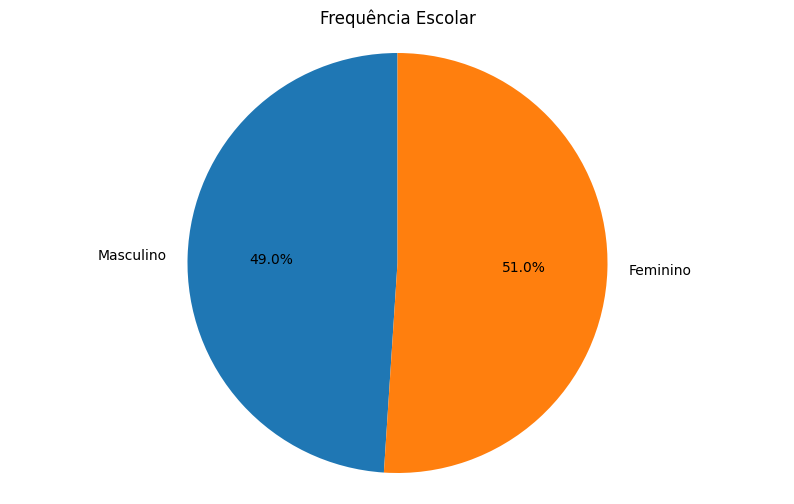

In [46]:
# População total brasileira
total_pop = tab1.iloc[0:14, 1]
total_homem = tab1.iloc[15:29, 1]
total_mulher = tab1.iloc[30:44, 1]

# Prepara tabela proposta
tabela = [['Sexo', 'Total', 'Frequência (%)'],['Masculino'],['Feminino']]
tabela[1].append(int(np.sum(total_homem)))
tabela[1].append(np.sum(total_homem) / np.sum(total_pop) * 100)
tabela[2].append(int(np.sum(total_mulher)))
tabela[2].append(np.sum(total_mulher) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", intfmt="", colalign=(["center"]*3)))

# Prepara gráfico de setores
plt.figure(figsize=(10, 6))
plt.pie([np.sum(total_homem), np.sum(total_mulher)], startangle=90, autopct='%1.1f%%', labels=['Masculino','Feminino'])
plt.title('Frequência Escolar')
plt.axis('equal')
plt.show()

A partir da tabela e do gráfico, vê-se que os dados confirmam estatísticas já conhecidas acerca da população brasileira, destacando a maior presença de habitantes do sexo feminino que do sexo masculino.

### Cor ou Raça
É de grande importância se analizar o impacto de cor ou raça sobre a educação, com vistas à criação de políticas públicas direcionadas à universalização do ensino. Portanto, será trazido abaixo as frequências gerais de cada cor ou raça sobre a população brasileira.

In [47]:
# População total brasileira
cor_total = [tab2.iloc[0:12, x] for x in range(2, 8)]

# Prepara tabela proposta
tabela = [['Cor ou Raça', 'Total', 'Frequência (%)'],['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena'],['Sem Declaração']]

for x in range(0,6):
    tabela[x+1].append(int(np.sum(cor_total[x])))
    tabela[x+1].append(np.sum(cor_total[x]) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*3)))

╒════════════════╤══════════╤══════════════════╕
│  Cor ou Raça   │  Total   │  Frequência (%)  │
╞════════════════╪══════════╪══════════════════╡
│     Branca     │ 90621281 │     47.5064      │
├────────────────┼──────────┼──────────────────┤
│     Preta      │ 14351162 │     7.52332      │
├────────────────┼──────────┼──────────────────┤
│    Amarela     │ 2105352  │     1.10369      │
├────────────────┼──────────┼──────────────────┤
│     Parda      │ 82820451 │      43.417      │
├────────────────┼──────────┼──────────────────┤
│    Indígena    │  821500  │     0.430656     │
├────────────────┼──────────┼──────────────────┤
│ Sem Declaração │  36050   │     0.018899     │
╘════════════════╧══════════╧══════════════════╛


Como é possível visualizar na tabela de frequências, o grupo de maior presença na população brasileira é o de cor ou raça "Branca", seguido logo atrás pela "Parda". Por outro lado, vê-se que o grupo menos presente é o de indígenas. Nas seções posteriores, tal variável será importante ao analisar a influência desta sobre a frequência escolar.

### Frequência Escolar

Uma das principais estatísticas ao se analisar o panorama educacional brasileiro é a frequência escolar. Portanto, traremos aqui uma tabela de frequências relacionando o percentual populacional em cada categoria, além de um gráfico de setores que a representa.

╒══════════════════════╤═══════════╤══════════════════╕
│  Frequência Escolar  │   Total   │  Frequência (%)  │
╞══════════════════════╪═══════════╪══════════════════╡
│      Frequenta       │ 59565188  │     31.2259      │
├──────────────────────┼───────────┼──────────────────┤
│    Já frequentou     │ 112465161 │     58.9577      │
├──────────────────────┼───────────┼──────────────────┤
│   Nunca frequentou   │ 18725449  │     9.81645      │
╘══════════════════════╧═══════════╧══════════════════╛


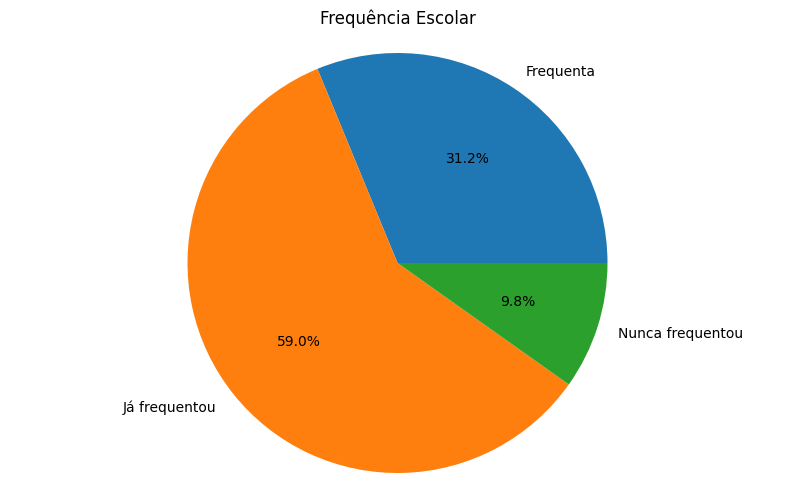

In [48]:
# População total brasileira
freq_pop = tab1.iloc[0:14, 2]
jafreq_pop = tab1.iloc[0:14, 3]
nfreq_pop = tab1.iloc[0:14, 4]

# Prepara tabela proposta
tabela = [['Frequência Escolar', 'Total', 'Frequência (%)'],['Frequenta'],['Já frequentou'],['Nunca frequentou']]
tabela[1].append(int(np.sum(freq_pop)))
tabela[1].append(np.sum(freq_pop) / np.sum(total_pop) * 100)
tabela[2].append(int(np.sum(jafreq_pop)))
tabela[2].append(np.sum(jafreq_pop) / np.sum(total_pop) * 100)
tabela[3].append(int(np.sum(nfreq_pop)))
tabela[3].append(np.sum(nfreq_pop) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", intfmt="", colalign=(["center"]*3)))

# Prepara gráfico de setores
plt.figure(figsize=(10, 6))
plt.pie([np.sum(freq_pop), np.sum(jafreq_pop), np.sum(nfreq_pop)], autopct='%1.1f%%', labels=['Frequenta','Já frequentou','Nunca frequentou'])
plt.title('Frequência Escolar')
plt.axis('equal')
plt.show()

A partir da tabela e do gráfico, vê-se que grande parte da população (59.0%) já frequentou a escola, fato condizente com a população adulta brasileira, mas que deve ser analisado mais a fundo. Igualmente, 31.2% da população frequenta a escola, o que muito provavelmente corresponde à parcela da população em idade escolar. No entanto, 9.8% da população nunca frequentou a escola, indicando uma dado preocupante de falha no acesso ao ambiente escolar.

### Idade
Idade é um dado de grande influência sobre a relação do habitante com o ambiente escolar. Portanto, uma análise preliminar desta através de uma tabela de frequências é aqui construída.

In [49]:
# Prepara tabela proposta
tabela = [['Idade', 'Total', 'Frequência (%)'],['0 a 3 anos'],['4 anos'],['5 anos'],['6 anos'],['7 a 9 anos'],['10 a 14 anos'],['15 a 17 anos'],['18 a 19 anos'],['20 a 24 anos'],['25 a 29 anos'],['30 a 39 anos'],['40 a 49 anos'],['50 a 59 anos'],['60 ou mais anos']]

for x in range(0,14):
    tabela[x+1].append(int(total_pop[x]))
    tabela[x+1].append(total_pop[x] / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", intfmt="", colalign=(["center"]*3)))

╒═════════════════╤══════════╤══════════════════╕
│      Idade      │  Total   │  Frequência (%)  │
╞═════════════════╪══════════╪══════════════════╡
│   0 a 3 anos    │ 10938913 │     5.73451      │
├─────────────────┼──────────┼──────────────────┤
│     4 anos      │ 2867819  │      1.5034      │
├─────────────────┼──────────┼──────────────────┤
│     5 anos      │ 2933763  │     1.53797      │
├─────────────────┼──────────┼──────────────────┤
│     6 anos      │ 2891614  │     1.51587      │
├─────────────────┼──────────┼──────────────────┤
│   7 a 9 anos    │ 9142389  │     4.79272      │
├─────────────────┼──────────┼──────────────────┤
│  10 a 14 anos   │ 17167135 │     8.99954      │
├─────────────────┼──────────┼──────────────────┤
│  15 a 17 anos   │ 10353865 │     5.42781      │
├─────────────────┼──────────┼──────────────────┤
│  18 a 19 anos   │ 6632922  │     3.47718      │
├─────────────────┼──────────┼──────────────────┤
│  20 a 24 anos   │ 17240863 │     9.03819      │


Vê-se uma grande heterogeneidade sobre a distribuição brasileira dentre esse espectro de idades, dado pela pirâmide etária brasileira. Portanto, em análises futuras envolvendo idades, o número de pessoas em uma dada idade será tratado de forma percentual, de forma que ainda seja possível enxergar padrões dentre a população.

### Renda
Renda também constitui um fator de grande influência sobre o acesso à educação. Desse modo, traz-se novamente uma análise preliminar de tal informação.

In [50]:
# População total brasileira
renda_total = [tab3.iloc[0:12, x] for x in range(2, 10)]

# Prepara tabela proposta
tabela = [['Renda', 'Total', 'Frequência (%)'],['Sem renda'],["Até 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["Mais de 5"]]

for x in range(0,8):
    tabela[x+1].append(int(np.sum(renda_total[x])))
    tabela[x+1].append(np.sum(renda_total[x]) / np.sum(total_pop) * 100)

print(tabulate(tabela, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*3)))

╒═══════════╤══════════╤══════════════════╕
│   Renda   │  Total   │  Frequência (%)  │
╞═══════════╪══════════╪══════════════════╡
│ Sem renda │ 7039630  │     3.69039      │
├───────────┼──────────┼──────────────────┤
│  Até 1/4  │ 23802968 │     12.4782      │
├───────────┼──────────┼──────────────────┤
│ 1/4 a 1/2 │ 35029585 │     18.3636      │
├───────────┼──────────┼──────────────────┤
│  1/2 a 1  │ 52066691 │     27.2949      │
├───────────┼──────────┼──────────────────┤
│   1 a 2   │ 40481415 │     21.2216      │
├───────────┼──────────┼──────────────────┤
│   2 a 3   │ 12973764 │     6.80124      │
├───────────┼──────────┼──────────────────┤
│   3 a 5   │ 9428422  │     4.94267      │
├───────────┼──────────┼──────────────────┤
│ Mais de 5 │ 8939342  │     4.68628      │
╘═══════════╧══════════╧══════════════════╛


Analisando-se os dados de renda, vê-se uma concentração de pessoas no intervalo de renda entre 1/2 e 1 salário mínimo, enquanto o menor número de pessoas encontra-se na categoria "Sem renda". No entanto, nota-se que a maior parte da população possui renda inferior a 1 salário mínimo. Estudaremos os impatos de tal fato sobre a educação.

## Medidas Resumo

Caracterizados os dados que serão empregados na análise, descreveremos agora relações entre os demais dados e a frequência escolar, de forma a caracterizar a interdependência entre os dados. Note que serão empregados dados de diferentes regiões brasileiras para garantir uma visão ampla sobre as medidas obtidas, em termos de médias e desvios.

De modo a iniciar a análise, calcularemos as medidas resumo dos dados obtidos, manifestando-se através da média, desvio padrão, 1º quartil, mediana, 3º quartil e máximo de cada uma. Portanto, segue a análise.

### Relação entre sexo e frequência escolar 
Nesta seção serão abordadas medidas que descrevam a relação entre o percentual da população que encontra-se em uma dada situação de escolaridade em relação a seu sexo, contemplando diferentes regiões dentre os dados originais.

#### Frequenta a escola

Abaixo são calculadas as medidas resumo para o percentual da população que frequenta a escola.

In [51]:
# Percentual da população que frequenta a escola
freq_pop = pd.DataFrame([tab1_reg[x].iloc[0, 2] / tab1_reg[x].iloc[0, 1] * 100 for x in range(5)])
freq_homem = pd.DataFrame([tab1_reg[x].iloc[16, 2] / tab1_reg[x].iloc[16, 1] * 100 for x in range(5)])
freq_mulher = pd.DataFrame([tab1_reg[x].iloc[32, 2] / tab1_reg[x].iloc[32, 1] * 100 for x in range(5)])

# Calcular estatísticas descritivas para cada categoria
desc_freq_pop = freq_pop.describe()
desc_freq_homem = freq_homem.describe()
desc_freq_mulher = freq_mulher.describe()

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que frequenta a escola")

linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
reg_freq_print = [linhas,['total'],['homem'],['mulher']]
for x in [1, 2, 4, 5, 6, 7]:
    reg_freq_print[1].append(desc_freq_pop.values[x][0])
    reg_freq_print[2].append(desc_freq_homem.values[x][0])
    reg_freq_print[3].append(desc_freq_mulher.values[x][0])

data = (np.array(reg_freq_print).T)
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

Medidas resumo para percentual da população que frequenta a escola
╒═══════════════╤═════════╤═════════╤══════════╕
│               │  total  │  homem  │  mulher  │
╞═══════════════╪═════════╪═════════╪══════════╡
│     média     │ 31.8078 │ 31.7345 │ 31.8908  │
├───────────────┼─────────┼─────────┼──────────┤
│ desvio padrão │ 2.99029 │  2.604  │ 3.40866  │
├───────────────┼─────────┼─────────┼──────────┤
│  1º quartil   │ 29.5416 │ 30.0352 │ 29.0744  │
├───────────────┼─────────┼─────────┼──────────┤
│    mediana    │ 31.2576 │ 30.9293 │ 31.5814  │
├───────────────┼─────────┼─────────┼──────────┤
│  3º quartil   │ 33.7067 │ 33.7796 │ 33.6372  │
├───────────────┼─────────┼─────────┼──────────┤
│    máximo     │ 35.893  │ 35.0705 │ 36.7307  │
╘═══════════════╧═════════╧═════════╧══════════╛


Vê-se que em média, 31.8% da população frequenta atualmente a escola, sendo que, em geral, as mulheres lideram este quesito por 0.2% em relação aos homens. De todo modo, é perceptível um desvio padrão maior dentre mulheres, mostrando a alta variabilidade dos dados para diferentes regiões brasileiras.

#### Já frequentou a escola

Abaixo são calculadas as medidas resumo para o percentual da população que já frequentou a escola.

In [52]:
jafreq_pop = pd.DataFrame([tab1_reg[x].iloc[0, 3] / tab1_reg[x].iloc[0, 1] * 100 for x in range(5)])
jafreq_homem = pd.DataFrame([tab1_reg[x].iloc[16, 3] / tab1_reg[x].iloc[16, 1] * 100 for x in range(5)])
jafreq_mulher = pd.DataFrame([tab1_reg[x].iloc[32, 3] / tab1_reg[x].iloc[32, 1] * 100 for x in range(5)])

# Calcular estatísticas descritivas para cada categoria
desc_jafreq_pop = jafreq_pop.describe()
desc_jafreq_homem = jafreq_homem.describe()
desc_jafreq_mulher = jafreq_mulher.describe()

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que já frequentou escola")

linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
reg_jafreq_print = [linhas,['total'],['homem'],['mulher']]
for x in [1, 2, 4, 5, 6, 7]:
    reg_jafreq_print[1].append(desc_jafreq_pop.values[x][0])
    reg_jafreq_print[2].append(desc_jafreq_homem.values[x][0])
    reg_jafreq_print[3].append(desc_jafreq_mulher.values[x][0])

data = (np.array(reg_jafreq_print).T)
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

Medidas resumo para percentual da população que já frequentou escola
╒═══════════════╤═════════╤═════════╤══════════╕
│               │  total  │  homem  │  mulher  │
╞═══════════════╪═════════╪═════════╪══════════╡
│     média     │ 57.6929 │ 57.5534 │ 57.8217  │
├───────────────┼─────────┼─────────┼──────────┤
│ desvio padrão │ 5.84346 │ 5.83228 │ 5.88299  │
├───────────────┼─────────┼─────────┼──────────┤
│  1º quartil   │ 53.6807 │ 52.9566 │ 54.3711  │
├───────────────┼─────────┼─────────┼──────────┤
│    mediana    │ 58.4075 │ 58.4604 │ 58.3553  │
├───────────────┼─────────┼─────────┼──────────┤
│  3º quartil   │ 62.7001 │ 62.3988 │ 62.9853  │
├───────────────┼─────────┼─────────┼──────────┤
│    máximo     │ 63.6734 │ 63.6824 │ 63.6646  │
╘═══════════════╧═════════╧═════════╧══════════╛


Vê-se que, em média, 57.7% da população já frequentou a escola, sendo que, em geral, mulheres lideram este quesito por 0.3% em relação aos homens. É perceptível um crescimento no desvio padrão, mostrando a alta variabilidade dos dados para diferentes regiões brasileiras.

#### Nunca frequentou a escola

Abaixo são calculadas as medidas resumo para o percentual da população nunca frequentou a escola.

In [53]:
nfreq_pop = pd.DataFrame([tab1_reg[x].iloc[0, 4] / tab1_reg[x].iloc[0, 1] * 100 for x in range(5)])
nfreq_homem = pd.DataFrame([tab1_reg[x].iloc[16, 4] / tab1_reg[x].iloc[16, 1] * 100 for x in range(5)])
nfreq_mulher = pd.DataFrame([tab1_reg[x].iloc[32, 4] / tab1_reg[x].iloc[32, 1] * 100 for x in range(5)])

# Calcular estatísticas descritivas para cada categoria
desc_nfreq_pop = nfreq_pop.describe()
desc_nfreq_homem = nfreq_homem.describe()
desc_nfreq_mulher = nfreq_mulher.describe()

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que nunca frequentou escola")

linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
reg_nfreq_print = [linhas,['total'],['homem'],['mulher']]
for x in [1, 2, 4, 5, 6, 7]:
    reg_nfreq_print[1].append(desc_nfreq_pop.values[x][0])
    reg_nfreq_print[2].append(desc_nfreq_homem.values[x][0])
    reg_nfreq_print[3].append(desc_nfreq_mulher.values[x][0])

data = (np.array(reg_nfreq_print).T)
print(tabulate(data, headers='firstrow', tablefmt="fancy_grid", colalign=(["center"]*4)))

Medidas resumo para percentual da população que nunca frequentou escola
╒═══════════════╤═════════╤═════════╤══════════╕
│               │  total  │  homem  │  mulher  │
╞═══════════════╪═════════╪═════════╪══════════╡
│     média     │ 10.4993 │ 10.7121 │ 10.2875  │
├───────────────┼─────────┼─────────┼──────────┤
│ desvio padrão │ 2.8685  │ 3.26299 │ 2.48509  │
├───────────────┼─────────┼─────────┼──────────┤
│  1º quartil   │ 7.75827 │ 7.56597 │ 7.94027  │
├───────────────┼─────────┼─────────┼──────────┤
│    mediana    │ 10.3349 │ 10.6104 │ 10.0633  │
├───────────────┼─────────┼─────────┼──────────┤
│  3º quartil   │ 12.6126 │ 13.2638 │ 11.9917  │
├───────────────┼─────────┼─────────┼──────────┤
│    máximo     │ 14.1042 │ 14.6607 │ 13.5374  │
╘═══════════════╧═════════╧═════════╧══════════╛


Vê-se que, em média, 10.5% da população nunca frequentou a escola, sendo que, em geral, homens lideram este quesito por 0.4% em relação às mulheres. Portanto, é demonstrado um alto número de pessoas que nunca compareceu à escola, notavelmente independente do sexo.

É perceptível uma considerável desvio padrão dentre os homens, permitindo inferir uma certa variação na evasão escolar dentre regiões brasileiras.

### Relação entre cor ou raça e frequência escolar
Nesta seção serão abordadas medidas que descrevam a relação entre o percentual da população encontra-se em uma dada situação de escolaridade em relação a sua cor ou raça, contemplando diferentes regiões brsileiras dentre os dados originais. Nesta seção, ista se dará na forma de tabelas e de boxplots.

#### Frequenta a escola
Abaixo são calculadas as medidas resumo para o percentual da população frequenta a escola.

Medidas resumo para percentual da população que frequenta a escola
╒═══════════════╤══════════╤═════════╤═══════════╤═════════╤════════════╕
│               │  Branca  │  Preta  │  Amarela  │  Parda  │  Indígena  │
╞═══════════════╪══════════╪═════════╪═══════════╪═════════╪════════════╡
│     média     │  31.214  │ 27.396  │  30.174   │ 33.256  │   33.286   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│ desvio padrão │  2.868   │  2.026  │   3.979   │  2.426  │   5.038    │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│  1º quartil   │  28.756  │ 25.920  │  26.210   │ 31.662  │   30.893   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│    mediana    │  30.742  │ 25.963  │  30.451   │ 32.369  │   34.945   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│  3º quartil   │  33.303  │ 29.305  │  33.361   │ 34.583  │   36.494   │
├───────────────┼──────────┼─────────┼───────

/tmp/ipykernel_171330/1515161207.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cor_freq_print[y + 1].append(desc_cor_freq[y][x])


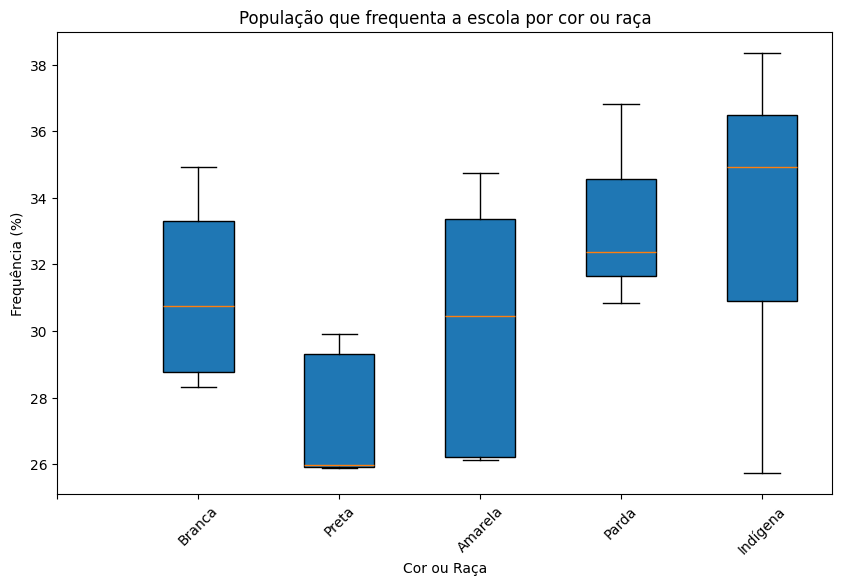

In [54]:
# Conjuntos de dados de cor ou raça
cor_total = pd.DataFrame([tab2_reg[x].iloc[0, 2:7] for x in range(5)])
cor_freq = pd.DataFrame([tab2_reg[x].iloc[13, 2:7] / cor_total.values[x] * 100 for x in range(5)])
cor_jafreq = pd.DataFrame([tab2_reg[x].iloc[26, 2:7] / cor_total.values[x] * 100 for x in range(5)])
cor_nfreq = pd.DataFrame([tab2_reg[x].iloc[39, 2:7] / cor_total.values[x] * 100 for x in range(5)])

# Calcular estatísticas descritivas para cada categoria
desc_cor_freq = [cor_freq.iloc[:,x].describe() for x in range(5)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que frequenta a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
cor_freq_print = [linhas,['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena']]
for y in range(5):
    for x in [1, 2, 4, 5, 6, 7]:
        cor_freq_print[y + 1].append(desc_cor_freq[y][x])

data = (np.array(cor_freq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*6), floatfmt=".3f"))

# Plota box plot
plt.figure(figsize=(10, 6))
plt.boxplot(cor_freq.values, patch_artist=True)

# Define rótulos do gráfico
plt.xlabel('Cor ou Raça')
plt.ylabel('Frequência (%)')
plt.title('População que frequenta a escola por cor ou raça')
plt.xticks(range(6), ['','Branca','Preta','Amarela','Parda','Indígena'], rotation=45)

plt.show()

A partir das informações na tabela e no boxplot acima, vê-se que todos os grupos encontram-se bem próximos na porcentagem populacional que frequenta a escola, destacando-se os _indígenas_, que mais frequentam em relação aos demais. Nota-se também que a população _preta_ tem um percentual de pessoas que frequenta a escola ligeiramente menor que as demais populações.

#### Já frequentou a escola
Abaixo são calculadas as medidas resumo para o percentual da população já frequentou a escola.

Medidas resumo para percentual da população que já frequentou a escola
╒═══════════════╤══════════╤═════════╤═══════════╤═════════╤════════════╕
│               │  Branca  │  Preta  │  Amarela  │  Parda  │  Indígena  │
╞═══════════════╪══════════╪═════════╪═══════════╪═════════╪════════════╡
│     média     │  58.935  │ 61.670  │  60.985   │ 55.670  │   44.293   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│ desvio padrão │  5.622   │  4.469  │   6.455   │  4.524  │   14.157   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│  1º quartil   │  54.619  │ 58.039  │  55.211   │ 52.570  │   36.278   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│    mediana    │  59.533  │ 63.404  │  61.742   │ 57.132  │   45.436   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│  3º quartil   │  64.113  │ 65.131  │  66.917   │ 59.485  │   50.313   │
├───────────────┼──────────┼─────────┼───

/tmp/ipykernel_171330/2161273840.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cor_jafreq_print[y + 1].append(desc_cor_jafreq[y][x])


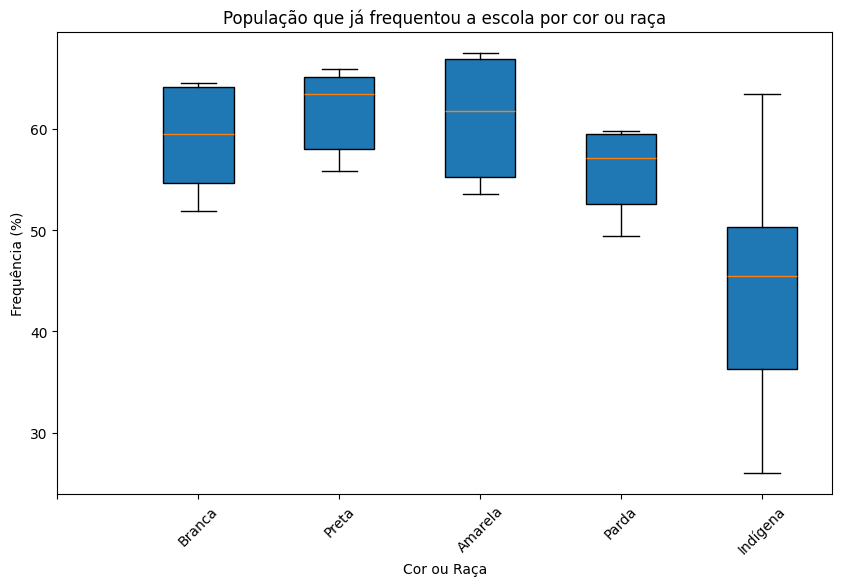

In [55]:
# Calcular estatísticas descritivas para cada categoria
desc_cor_jafreq = [cor_jafreq.iloc[:,x].describe() for x in range(5)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que já frequentou a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
cor_jafreq_print = [linhas,['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena']]
for y in range(5):
    for x in [1, 2, 4, 5, 6, 7]:
        cor_jafreq_print[y + 1].append(desc_cor_jafreq[y][x])

data = (np.array(cor_jafreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*6), floatfmt=".3f"))

# Plota box plot
plt.figure(figsize=(10, 6))
plt.boxplot(cor_jafreq.values, patch_artist=True)

# Define rótulos do gráfico
plt.xlabel('Cor ou Raça')
plt.ylabel('Frequência (%)')
plt.title('População que já frequentou a escola por cor ou raça')
plt.xticks(range(6), ['','Branca','Preta','Amarela','Parda','Indígena'], rotation=45)

plt.show()

A partir das informações na tabela e no boxplot acima, vê-se que todos os grupos encontram-se bem próximos na porcentagem populacional que já frequentou a escola, excetuando-se os "indígenas", que menos frequentaram em relação aos demais. Além disso, vê-se que a população "preta" e "amarela" têm um percentual de pessoas a já frequentar a escola ligeiramente maior que as populações "branca" e "parda".

#### Nunca frequentou a escola
Abaixo são calculadas as medidas resumo para o percentual da população nunca frequentou a escola.

Medidas resumo para percentual da população que nunca frequentou a escola
╒═══════════════╤══════════╤═════════╤═══════════╤═════════╤════════════╕
│               │  Branca  │  Preta  │  Amarela  │  Parda  │  Indígena  │
╞═══════════════╪══════════╪═════════╪═══════════╪═════════╪════════════╡
│     média     │  9.851   │ 10.934  │   8.841   │ 11.074  │   22.421   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│ desvio padrão │  2.763   │  2.532  │   2.540   │  2.169  │   10.645   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│  1º quartil   │  7.164   │  8.976  │   6.874   │  9.662  │   16.203   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│    mediana    │  9.725   │ 10.676  │   7.807   │ 10.499  │   18.795   │
├───────────────┼──────────┼─────────┼───────────┼─────────┼────────────┤
│  3º quartil   │  12.078  │ 12.656  │  11.429   │ 12.847  │   28.777   │
├───────────────┼──────────┼─────────┼

/tmp/ipykernel_171330/1340649879.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cor_nfreq_print[y + 1].append(desc_cor_nfreq[y][x])


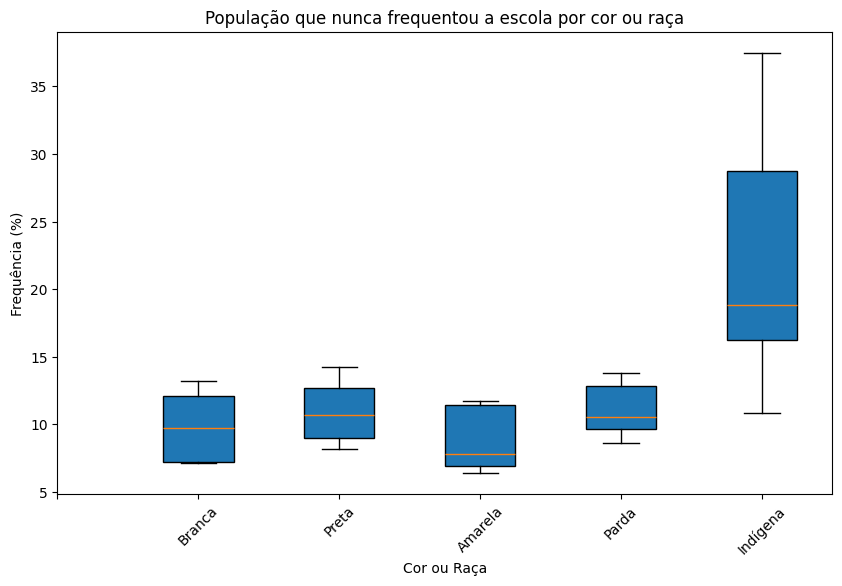

In [56]:
# Calcular estatísticas descritivas para cada categoria
desc_cor_nfreq = [cor_nfreq.iloc[:,x].describe() for x in range(5)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que nunca frequentou a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
cor_nfreq_print = [linhas,['Branca'],['Preta'],['Amarela'],['Parda'],['Indígena']]
for y in range(5):
    for x in [1, 2, 4, 5, 6, 7]:
        cor_nfreq_print[y + 1].append(desc_cor_nfreq[y][x])

data = (np.array(cor_nfreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*6), floatfmt=".3f"))

# Plota box plot
plt.figure(figsize=(10, 6))
plt.boxplot(cor_nfreq.values, patch_artist=True)

# Define rótulos do gráfico
plt.xlabel('Cor ou Raça')
plt.ylabel('Frequência (%)')
plt.title('População que nunca frequentou a escola por cor ou raça')
plt.xticks(range(6), ['','Branca','Preta','Amarela','Parda','Indígena'], rotation=45)

plt.show()

A partir das informações na tabela e no boxplot acima, vê-se que o grupo dos "indígenas" é o que menos frequentou a escola em relação aos demais, em graves 22.4%. Além disso, vê-se que o a população "preta" e "parda" tem um percentual de pessoas que nunca frequentou a escola maior que as populações "branca" e "amarela", o que indica uma maior taxa de evasão escolar dentre estes grupos.

Nota-se também um alto desvio padrão dentre os indígenas, indicando grandes diferenças na educação a eles oferecida entre diferentes regiões brasileiras.

### Relação entre renda e frequência escolar
Nesta seção serão abordadas medidas que descrevam a relação entre o percentual da população encontra-se em uma dada situação de escolaridade em relação a sua renda, contemplando diferentes regiões brasileiras na análise.

#### Frequenta a escola
Abaixo são calculadas as medidas resumo para o percentual da população que frequenta a escola.

In [57]:
# Conjuntos de dados de renda
renda_total = pd.DataFrame([tab3_reg[x].iloc[0, 2:10] for x in range(5)])
renda_freq = pd.DataFrame([tab3_reg[x].iloc[13, 2:10] / renda_total.values[x] * 100 for x in range(5)])
renda_jafreq = pd.DataFrame([tab3_reg[x].iloc[26, 2:10] / renda_total.values[x] * 100 for x in range(5)])
renda_nfreq = pd.DataFrame([tab3_reg[x].iloc[39, 2:10] / renda_total.values[x] * 100 for x in range(5)])

# Calcular estatísticas descritivas para cada categoria
desc_renda_freq = [renda_freq.iloc[:,x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que frequenta a escola")
linhas = ["", "média", "desvio padrão", "1º quartil", "mediana", "3º quartil", "máximo"]
renda_freq_print = [linhas, ["< 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["> 5"], ["0"]]
for y in range(8):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_freq_print[y + 1].append(desc_renda_freq[y][x])

data = (np.array(renda_freq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".3f"))

Medidas resumo para percentual da população que frequenta a escola
╒═══════════════╤═════════╤═════════════╤═══════════╤═════════╤═════════╤═════════╤════════╤════════╕
│               │  < 1/4  │  1/4 a 1/2  │  1/2 a 1  │  1 a 2  │  2 a 3  │  3 a 5  │  > 5   │   0    │
╞═══════════════╪═════════╪═════════════╪═══════════╪═════════╪═════════╪═════════╪════════╪════════╡
│     média     │ 42.994  │   37.138    │  30.111   │ 27.068  │ 27.941  │ 28.517  │ 26.284 │ 29.490 │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼────────┼────────┤
│ desvio padrão │  1.030  │    1.206    │   2.039   │  2.356  │  2.958  │  2.666  │ 2.665  │ 1.632  │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼────────┼────────┤
│  1º quartil   │ 42.413  │   35.988    │  29.757   │ 25.435  │ 25.136  │ 25.957  │ 23.668 │ 28.950 │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼────────┼────────┤
│    mediana   

/tmp/ipykernel_171330/2145474937.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  renda_freq_print[y + 1].append(desc_renda_freq[y][x])


Analisando a tabela acima, vê-se que a o percentual média da população que frequenta a escola decresce gradativamente de acordo com o aumento da renda, um fato de grande importância no contexto social brasileiro, indicando potenciais relações entre idade e renda, por exemplo.

#### Já frequentou a escola
Abaixo são calculadas as medidas resumo para o percentual da população que já frequentou a escola.

In [58]:
# Calcular estatísticas descritivas para cada categoria
desc_renda_jafreq = [renda_jafreq.iloc[:,x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que já frequentou a escola")
renda_jafreq_print = [linhas, ["< 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["> 5"], ["0"]]
for y in range(8):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_jafreq_print[y + 1].append(desc_renda_jafreq[y][x])

data = (np.array(renda_jafreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".3f"))

Medidas resumo para percentual da população que já frequentou a escola
╒═══════════════╤═════════╤═════════════╤═══════════╤═════════╤═════════╤═════════╤════════╤════════╕
│               │  < 1/4  │  1/4 a 1/2  │  1/2 a 1  │  1 a 2  │  2 a 3  │  3 a 5  │  > 5   │   0    │
╞═══════════════╪═════════╪═════════════╪═══════════╪═════════╪═════════╪═════════╪════════╪════════╡
│     média     │ 40.690  │   49.180    │  58.521   │ 66.366  │ 67.872  │ 68.041  │ 70.948 │ 53.359 │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼────────┼────────┤
│ desvio padrão │  2.536  │    2.035    │   2.355   │  3.267  │  3.789  │  3.345  │ 3.222  │ 5.553  │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼────────┼────────┤
│  1º quartil   │ 39.538  │   47.948    │  56.904   │ 65.343  │ 66.363  │ 65.902  │ 69.547 │ 51.924 │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼────────┼────────┤
│    median

/tmp/ipykernel_171330/428023122.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  renda_jafreq_print[y + 1].append(desc_renda_jafreq[y][x])


Analisando a tabela acima, vê-se que a o percentual médio da população que já frequentou a escola cresce de acordo com a renda (desconsiderando a classe _sem rendimentos_). Tal fato indica que habitantes com alta renda já passaram pelo sistema educacional, em grande parte dos casos. 

#### Nunca frequentou a escola
Abaixo são calculadas as medidas resumo para o percentual da população que nunca frequentou a escola.

In [59]:
# Calcular estatísticas descritivas para cada categoria
desc_renda_nfreq = [renda_nfreq.iloc[:,x].describe() for x in range(8)]

# Mostrar as estatísticas descritivas
print("Medidas resumo para percentual da população que nunca frequentou a escola")
renda_nfreq_print = [linhas, ["< 1/4"], ["1/4 a 1/2"], ["1/2 a 1"], ["1 a 2"], ["2 a 3"], ["3 a 5"], ["> 5"], ["0"]]
for y in range(8):
    for x in [1, 2, 4, 5, 6, 7]:
        renda_nfreq_print[y + 1].append(desc_renda_nfreq[y][x])

data = (np.array(renda_nfreq_print).T)
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid", colalign=(["center"]*9), floatfmt=".3f"))

Medidas resumo para percentual da população que nunca frequentou a escola
╒═══════════════╤═════════╤═════════════╤═══════════╤═════════╤═════════╤═════════╤═══════╤════════╕
│               │  < 1/4  │  1/4 a 1/2  │  1/2 a 1  │  1 a 2  │  2 a 3  │  3 a 5  │  > 5  │   0    │
╞═══════════════╪═════════╪═════════════╪═══════════╪═════════╪═════════╪═════════╪═══════╪════════╡
│     média     │ 16.315  │   13.682    │  11.368   │  6.566  │  4.188  │  3.442  │ 2.768 │ 17.151 │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼───────┼────────┤
│ desvio padrão │  2.311  │    1.336    │   1.597   │  1.010  │  0.876  │  0.718  │ 0.588 │ 6.159  │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼───────┼────────┤
│  1º quartil   │ 15.147  │   13.109    │   9.906   │  5.561  │  3.518  │  2.870  │ 2.391 │ 11.475 │
├───────────────┼─────────┼─────────────┼───────────┼─────────┼─────────┼─────────┼───────┼────────┤
│    mediana    │

/tmp/ipykernel_171330/2717068183.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  renda_nfreq_print[y + 1].append(desc_renda_nfreq[y][x])


Analisando a tabela acima, vê-se que a o percentual média da população que nunca frequentou a escola decresce consideravelmente com o aumento da renda. Tal fato indica uma relação aparente entre evasão escolar e renda, além de trazer corroborações para afirmações acerca da última tabela.

## Representação Gráfica

Nesta seção, traremos representações gráficas das relações entre as variáveis até então apresentadas.

Comecemos, portanto, trazendo um panorama da distribuição da população brasileira dentre diferentes faixas etárias, conforme pode ser observado abaixo.

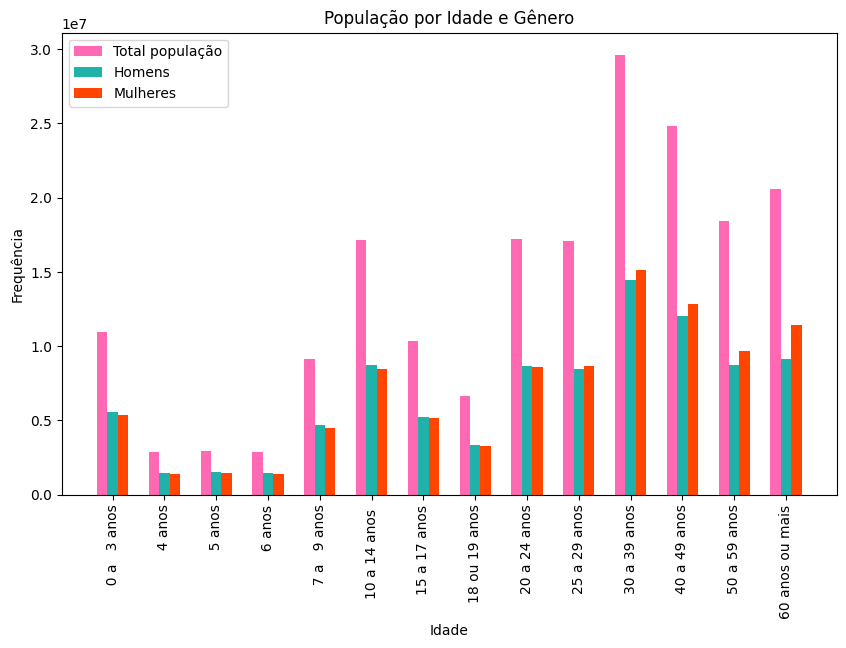

In [60]:
# População total brasileira
total_pop = tab1.iloc[0:14, 1]
total_homem = tab1.iloc[15:29, 1]
total_mulher = tab1.iloc[30:44, 1]

# Define faixas etárias a serem impressas abaixo de cada barra
rotulos_x = tab1.iloc[0:14, 0]

largura_barra = 0.2
indices = list(range(len(total_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], total_pop, largura_barra, color='hotpink', label='Total Pop')
plt.bar(indices, total_homem, largura_barra, color='lightseagreen', label='Total H')
plt.bar([i + largura_barra for i in indices], total_mulher , largura_barra, color='orangered', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('População por Idade e Gênero')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper left')

plt.show()

O gráfico de barras acima visualizado é equivalente à pirâmide etária brasileira, e não segue nenhuma distribuição específica, mas permiti-nos identificar que, de forma geral, o número de mulheres e de homens na população é bem semelhante, divergindo a partir dos 30 anos, quando passam a haver mais mulheres que homens na população.

Abaixo, verfica-se novamente essa relação através de um gráfico de dispersão.

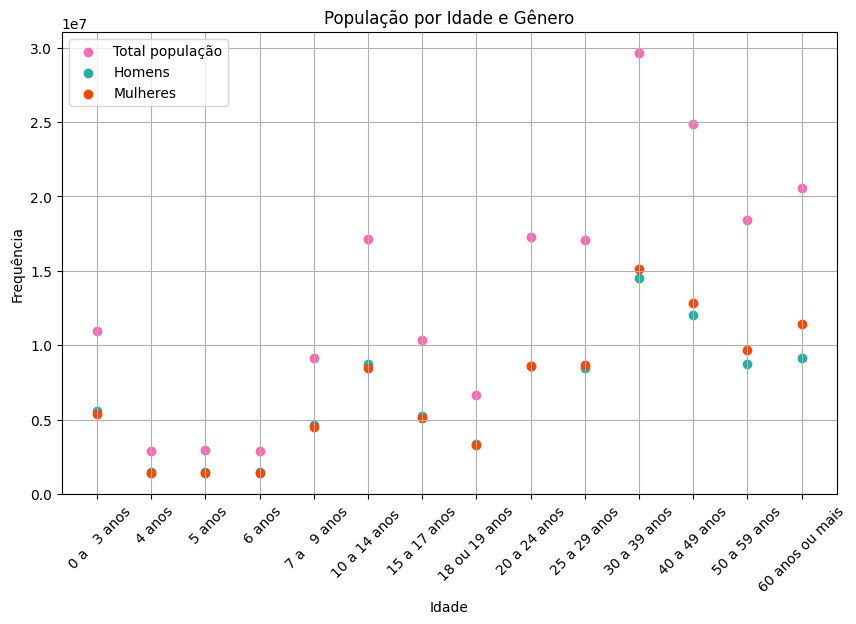

In [61]:
# Define faixas etárias a serem impressas abaixo de cada ponto
rotulos_y = tab1.iloc[0:14, 0]

# Plota scatter plot para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.scatter (indices, total_pop, color='hotpink')
plt.scatter (indices, total_homem, color='lightseagreen')
plt.scatter (indices, total_mulher, color='orangered')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('População por Idade e Gênero')
plt.xticks(indices, rotulos_x, rotation=45)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper left')

plt.grid(True)
plt.show()

### Frequência escolar em razão da idade

#### População que frequenta a escola
Primeiramente, plotaremos um gráfico de barras e outro de dispersão trazendo a relação entre a idade e a frequência escolar, de acordo com o sexo e de forma total. Note que o eixo horizontal adota diferentes faixas de idade, enquanto o eixo vertical adota o percentual de pessoas na dada faixa de idade que frequenta a escola.

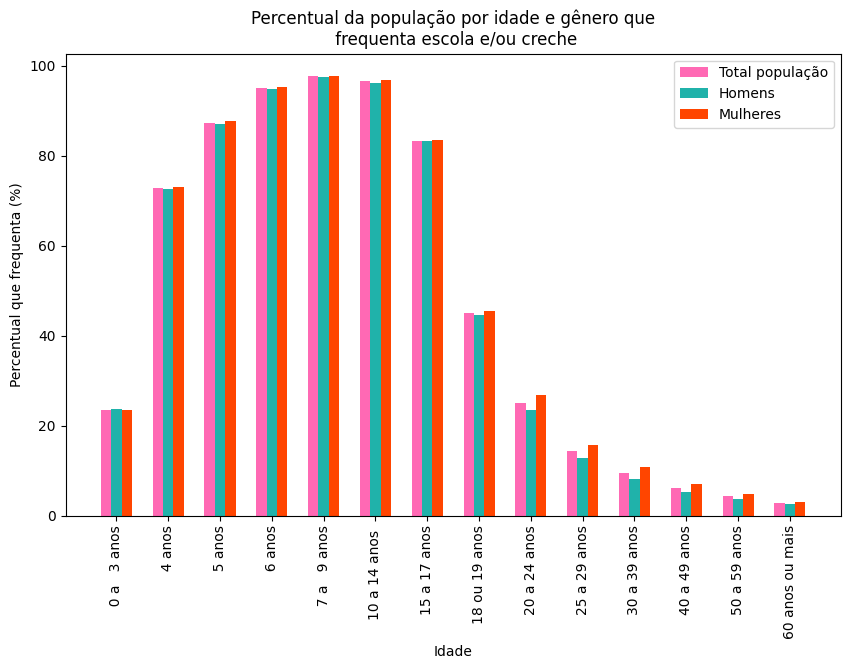

In [62]:
# Percentual da população que frequenta a escola
freq_pop = tab1.iloc[0:14, 2] / total_pop * 100
freq_homem = tab1.iloc[15:29, 2] / total_homem * 100
freq_mulher = tab1.iloc[30:44, 2] / total_mulher * 100

largura_barra = 0.2
indices = list(range(len(freq_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], freq_pop, largura_barra, color='hotpink', label='Total Pop')
plt.bar(indices, freq_homem, largura_barra, color='lightseagreen', label='Total H')
plt.bar([i + largura_barra for i in indices], freq_mulher , largura_barra, color='orangered', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Percentual que frequenta (%)')
plt.title('Percentual da população por idade e gênero que\n frequenta escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper right')

plt.show()

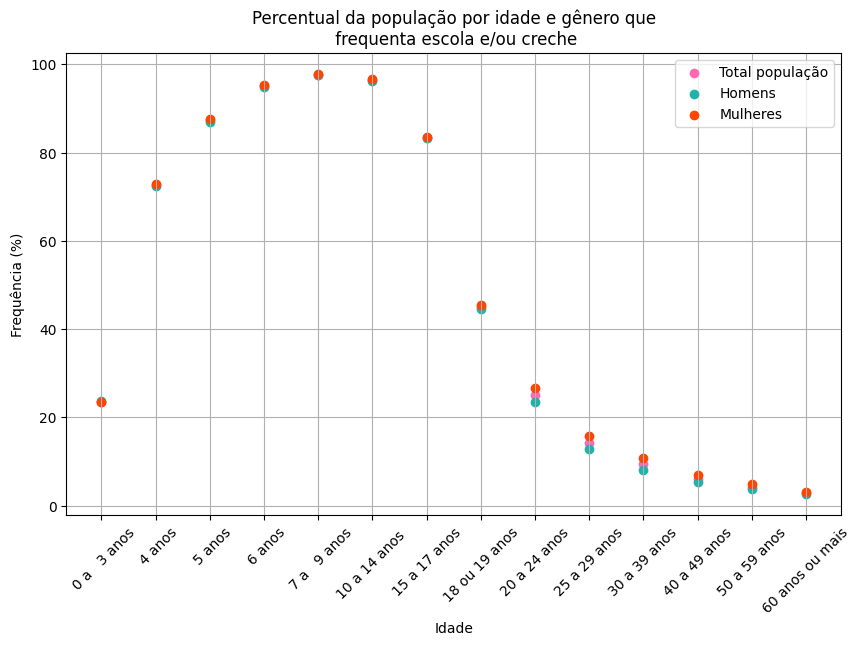

In [63]:
# Define faixas etárias a serem impressas abaixo de cada ponto
rotulos_y = tab1.iloc[0:14, 0]

# Plota scatter plot para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.scatter (indices, freq_pop, color='hotpink')
plt.scatter (indices, freq_homem, color='lightseagreen')
plt.scatter (indices, freq_mulher, color='orangered')

# Define rótulos do gráfico
plt.ylabel('Frequência (%)')
plt.xlabel('Idade')
plt.title('Percentual da população por idade e gênero que\n frequenta escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=45)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper right')

plt.grid(True)
plt.show()

Analisando o gráfico, nota-se que este sobe rapidamente para faixas de idade acima dos 3 anos de idade, chegando a seu máxima na faixa de 7 a 9 anos, e decaindo rapidamente a partir de então. Nota-se também que a frequência escolar é em grande parte independente do sexo, com um pequeno crescimento do percentual de mulheres em relação ao de homens percebido a partir dos 20 anos.

A partir do gráfico, verifica-se que a presença no ensino fundamental é relativamente alta (acima de 90%), decaindo significativamente ao avançar para o ensino médio (agora prócimo de 80%).

Também é perceptível a semelhança com a distribuição qui-quadrado, a qual pode ser analisada posteriormente.

#### População que já frequentou a escola
A seguir, tomaremos um novo gráfico de barras e um de dispersão trazendo a população que já frequentou a escola, nos mesmos moldes do anterior.

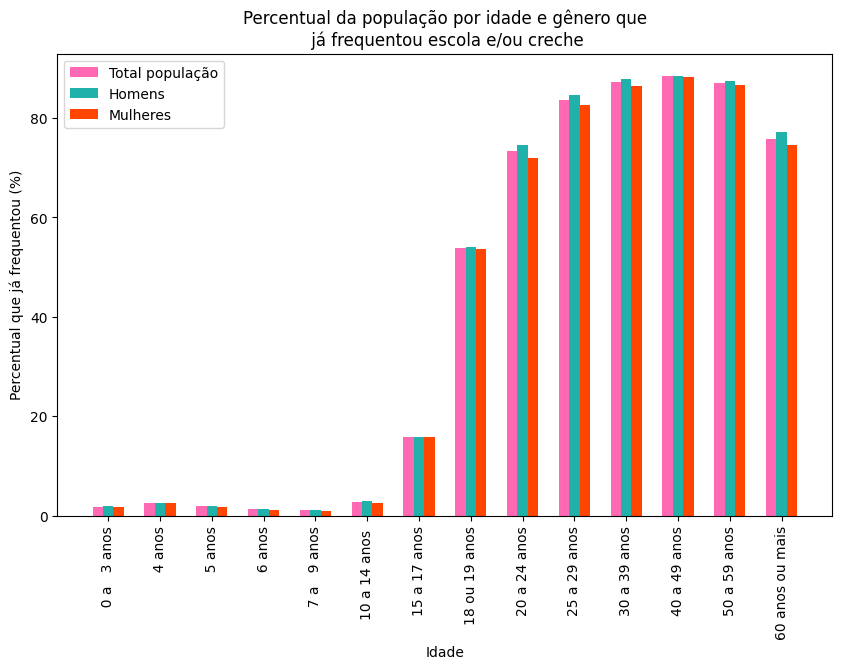

In [64]:
# percentual de população que já frequentou a escola
jafreq_pop = tab1.iloc[0:14, 3] / total_pop * 100
jafreq_homem = tab1.iloc[15:29, 3] / total_homem * 100
jafreq_mulher = tab1.iloc[30:44, 3] / total_mulher * 100

indices = list(range(len(jafreq_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], jafreq_pop, largura_barra, color='hotpink', label='Total Pop')
plt.bar(indices, jafreq_homem, largura_barra, color='lightseagreen', label='Total H')
plt.bar([i + largura_barra for i in indices],jafreq_mulher , largura_barra, color='orangered', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Percentual que já frequentou (%)')
plt.title('Percentual da população por idade e gênero que\n já frequentou escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper left')

plt.show()

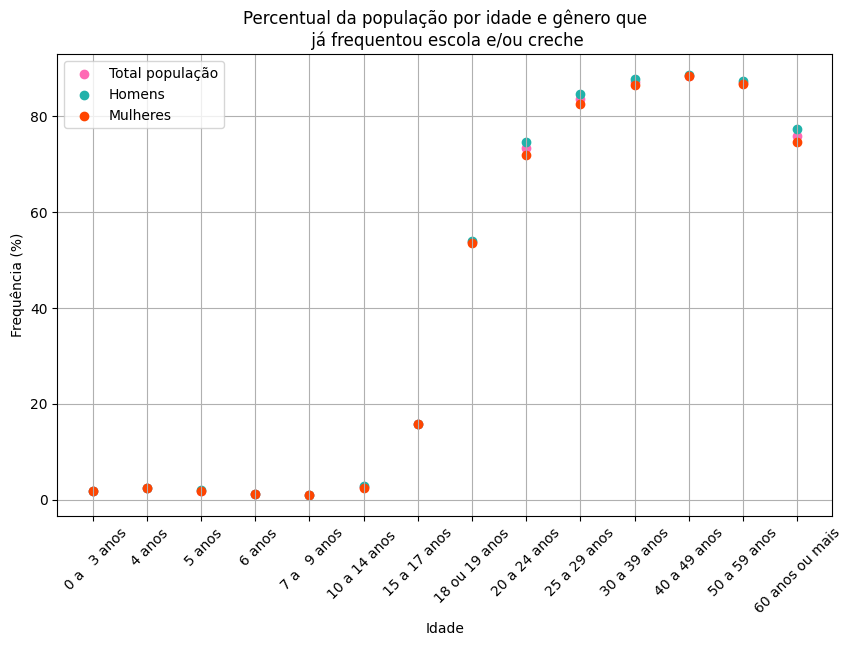

In [65]:
# Define faixas etárias a serem impressas abaixo de cada ponto
rotulos_y = tab1.iloc[0:14, 0]

# Plota scatter plot para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.scatter(indices, jafreq_pop, color='hotpink')
plt.scatter(indices, jafreq_homem, color='lightseagreen')
plt.scatter(indices, jafreq_mulher, color='orangered')

# Define rótulos do gráfico
plt.ylabel('Frequência (%)')
plt.xlabel('Idade')
plt.title('Percentual da população por idade e gênero que\n já frequentou escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=45)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper left')

plt.grid(True)
plt.show()

A partir do exposto nos gráficos, vê-se que o percentual da população que já frequentou a escola é extremamente baixo antes dos 15 anos, condizente com o último gráfico analisado, dado que grande parte encontra-se frequentando ativamente a escola. No entanto, a partir dos 15 anos, cresce rapidamente o número de pessoas que já frequentou a escola, chegando a seu máximo na faixa dos 40 a 49 anos. Sendo assim, identifica-se uma certa taxa de evasão escolar no ensino médio, além da prevalência de um baixo número de pessoas a continuar os estudos após o ensino básico. Por fim, uma queda na faixa acima dos 60 anos indica um conjunto de pessoas que nunca frequentou a escola, o que pode ser verificado no gráfico a seguir.

Percebe-se uma aproximação de uma distribuição normal com média em 40 anos.

#### População que nunca frequentou a escola
Novamente, tomaremos um novo gráfico de barras e de dispersão trazendo a população que nunca frequentou a escola, nos mesmos moldes já adotados.

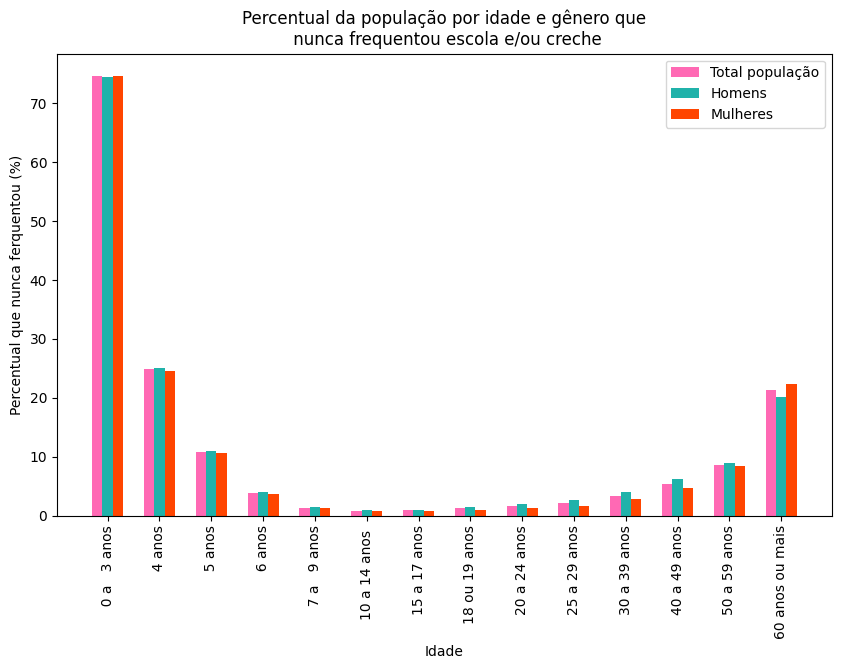

In [66]:
# percentual de população que nunca frequentou a escola
nfreq_pop = tab1.iloc[0:14, 4] / total_pop * 100
nfreq_homem = tab1.iloc[15:29, 4] / total_homem * 100
nfreq_mulher = tab1.iloc[30:44, 4] / total_mulher * 100

indices = list(range(len(nfreq_pop)))

# Plota barras para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices], nfreq_pop, largura_barra, color='hotpink', label='Total Pop')
plt.bar(indices, nfreq_homem, largura_barra, color='lightseagreen', label='Total H')
plt.bar([i + largura_barra for i in indices], nfreq_mulher , largura_barra, color='orangered', label='Total M')

# Define rótulos do gráfico
plt.xlabel('Idade')
plt.ylabel('Percentual que nunca ferquentou (%)')
plt.title('Percentual da população por idade e gênero que\n nunca frequentou escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=90)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper right')

plt.show()

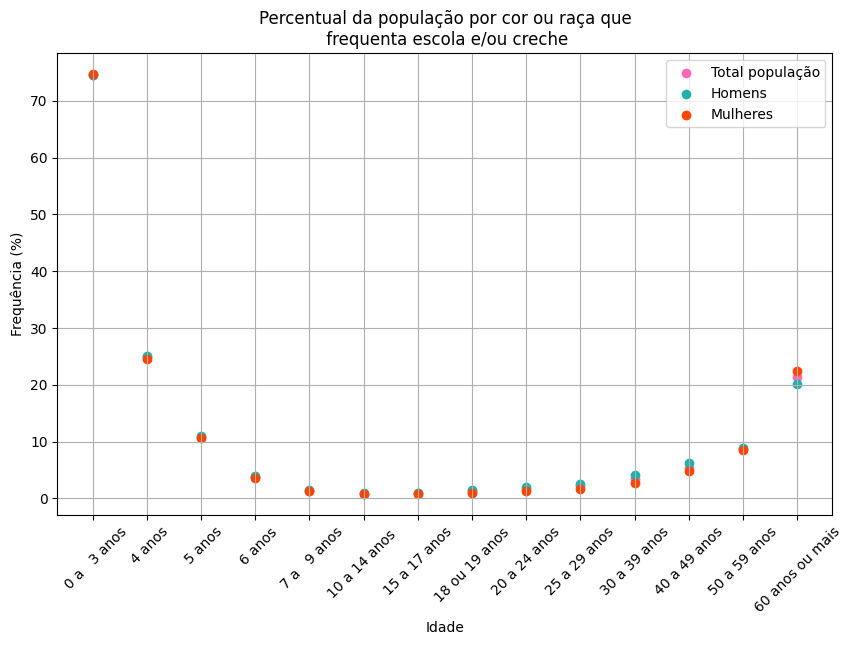

In [67]:
# Define faixas etárias a serem impressas abaixo de cada ponto
rotulos_y = tab1.iloc[0:14, 0]

# Plota scatter plot para total, homem e mulher
plt.figure(figsize=(10, 6))
plt.scatter(indices, nfreq_pop, color='hotpink')
plt.scatter(indices, nfreq_homem, color='lightseagreen')
plt.scatter(indices, nfreq_mulher, color='orangered')

# Define rótulos do gráfico
plt.ylabel('Frequência (%)')
plt.xlabel('Idade')
plt.title('Percentual da população por cor ou raça que\n frequenta escola e/ou creche')
plt.xticks(indices, rotulos_x, rotation=45)
plt.legend(['Total população', 'Homens', 'Mulheres'], loc='upper right')

plt.grid(True)
plt.show()

Com estes gráficos, constata-se que um baixo percentual de crianças vai à creche antes do 3 anos, aumentando para os 4 e 5 anos, mas ainda demonstrando uma evasão notável. Outro ponto interessante a se analisar é o percentual populacional que nunca compareceu à escola dentre as pessoas a partir dos 60 anos, indicando as mudanças do sistema educacional desde 1950 e a crescente importância atribuída à educação.

### Frequência escolar em razão da cor ou raça

Plotaremos um gráfico de barras trazendo a relação entre a cor ou raça e a frequência escolar, de forma total. Note que o eixo horizontal adota diferentes cores ou raças, enquanto o eixo vertical adota o percentual de pessoas no dado grupo que frequenta a escola. São plotadas barras paralelas para cada categoria de frequência escolar.

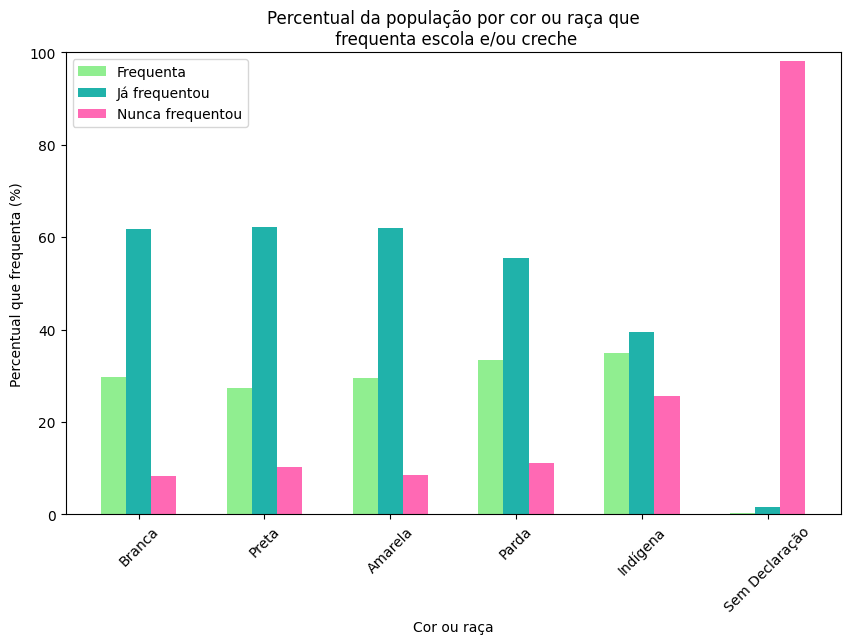

In [68]:
rotulos_x_cor = 'Branca','Preta','Amarela','Parda','Indígena','Sem Declaração'

cor_total = [tab2.iloc[0:12, x] for x in range(2, 8)]
cor_freq = [tab2.iloc[13:25, x] for x in range(2, 8)]
cor_jafreq = [tab2.iloc[26:38, x] for x in range(2, 8)]
cor_nfreq = [tab2.iloc[39:51, x] for x in range(2, 8)]

largura_barra = 0.2
lista_freq = [sum(cor_freq[x]) / sum(cor_total[x]) * 100 for x in range(6)]
lista_jafreq = [sum(cor_jafreq[x]) / sum(cor_total[x]) * 100 for x in range(6)]
lista_nfreq = [sum(cor_nfreq[x]) / sum(cor_total[x]) * 100 for x in range(6)]
indices_cor = list(range(len(lista_freq)))

# Plota barras
plt.figure(figsize=(10, 6))
plt.bar([i - largura_barra for i in indices_cor], lista_freq, largura_barra, color='lightgreen', label='Total H')
plt.bar(indices_cor, lista_jafreq, largura_barra, color='lightseagreen', label='Total H')
plt.bar([i + largura_barra for i in indices_cor], lista_nfreq, largura_barra, color='hotpink', label='Total H')

# Define rótulos do gráfico
plt.xlabel('Cor ou raça')
plt.ylabel('Percentual que frequenta (%)')
plt.title('Percentual da população por cor ou raça que\n frequenta escola e/ou creche')
plt.ylim([0,100])
plt.xticks(indices_cor, rotulos_x_cor, rotation=45)

plt.legend(['Frequenta', 'Já frequentou', 'Nunca frequentou'], loc='upper left')

plt.show()

Vê-se, por meio do gráfico, que o grupo _indígena_, de forma geral, possui um acesso mais precário que os demais à escola. Nesse sentido uma certa redução também é perceptível para os grupos _pretos_ e _pardos_, trazendo o peso das características sociais brasileiras sobre a análise.

A partir do exposto acima, vê-se que todos os grupos encontram-se bem próximos na porcentagem populacional que frequenta a escola, e que os _indígenas_ mais frequentam em relação aos demais. Nota-se também que a população _preta_ tem um percentual de pessoas que frequenta a escola ligeiramente menor que as demais. No grupo _sem declaração_, vê-se uma atendência à escola extremamente baixa, próxima de 0. Trata-se de um fato preocupante, mas que pode ser parcialmente atribuído ao baixo número de amostras e à natureza à parte da categoria (que será desconsiderada em análises posteriores). Além disso, é visível que os grupos encontram-se bem próximos na porcentagem populacional que já frequentou a escola, excetuando-se os _indígenas_ e _pardos_, que menos frequentaram em relação aos demais.

Por fim, vê-se que o grupo dos "indígenas" é o que menos frequentou a escola em relação aos demais, em graves 25% que nunca compareceram ao ambiente escolar. Além disso, vê-se que o a população "preta" e "parda" tem um percentual de pessoas que nunca frequentou a escola ligeiramente maior que as populações "branca" e "amarela", o que indica uma maior taxa de evasão escolar dentre estes grupos.

Abaixo, é construído um gráfico linear para avaliar a relação entre cor ou raça e o percentual de pessoas que frequenta ou já frequentou a escola.

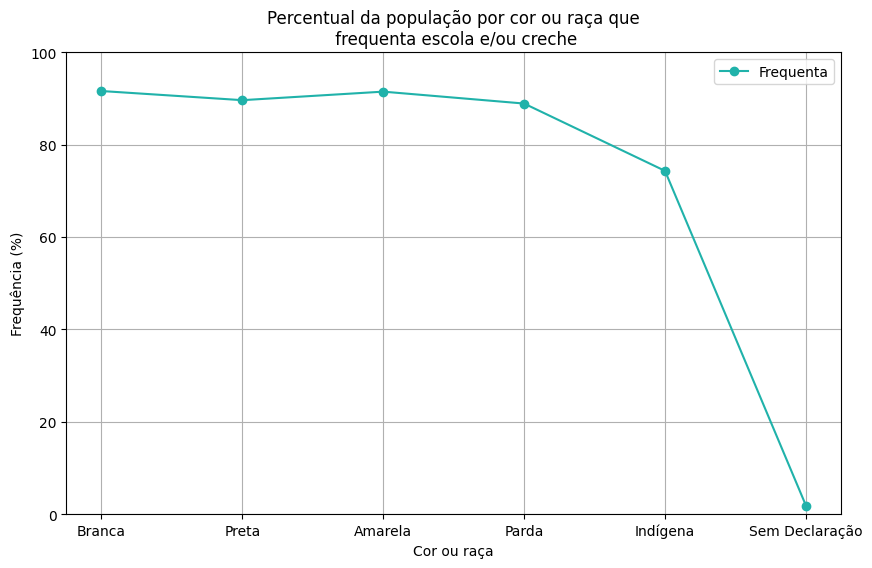

In [69]:
# Define faixas etárias a serem impressas abaixo de cada ponto
rotulos_y = tab1.iloc[0:14, 0]

# Plota scatter plot
lista = np.add(lista_jafreq, lista_freq)
plt.figure(figsize=(10, 6))
plt.plot(indices_cor, lista, marker='o', linestyle='-', color='lightseagreen')

# Define rótulos do gráfico
plt.ylabel('Frequência (%)')
plt.xlabel('Cor ou raça')
plt.title('Percentual da população por cor ou raça que\n frequenta escola e/ou creche')
plt.xticks(indices_cor, rotulos_x_cor)
plt.legend(['Frequenta', 'Já frequentou', 'Nunca frequentou'], loc='upper right')
plt.ylim([0,100])

lcor = [np.sum(np.array(cor_freq[x]) + np.array(cor_jafreq[x])) for x in range(6)]
lcorn = [np.sum(cor_nfreq[x]) for x in range(6)]
res = scp.chi2_contingency([lcorn, lcor])

plt.grid(True)
plt.show()

Vê-se novamente indígenas apresentam uma queda expressiva no acesso escolar de grupos _indígenas_, ainda mais acentuada para os sem declaração. Por outro lado, os demais grupos encontram-se em níveis similares, com ligeiras quedas para os grupos _pretos_ e _pardos_, atribuídas a fatores socioecônomicos da sociedade brasileira

### Frequência escolar em razão da renda

#### População que frequenta ou já frequentou a escola
Avaliaremos aqui, na forma de um gráfico de barras, a relação entre renda e escolaridade. No eixo vertical são separadas distintas classes de renda às quais a população pertence, enquanto no eixo vertical é mostrado o percentual da população dentro de tal nível de renda que frequenta ou já frequentou a escola.

A realização de análises separadas para cada situação de acesso à escola, como realizado anteriormente, foi descartada neste caso, pois a informação de maior relevância constitui de fato como o acesso, ou ausência deste, ao ambiente escolar. Portanto, segue o gráfico.

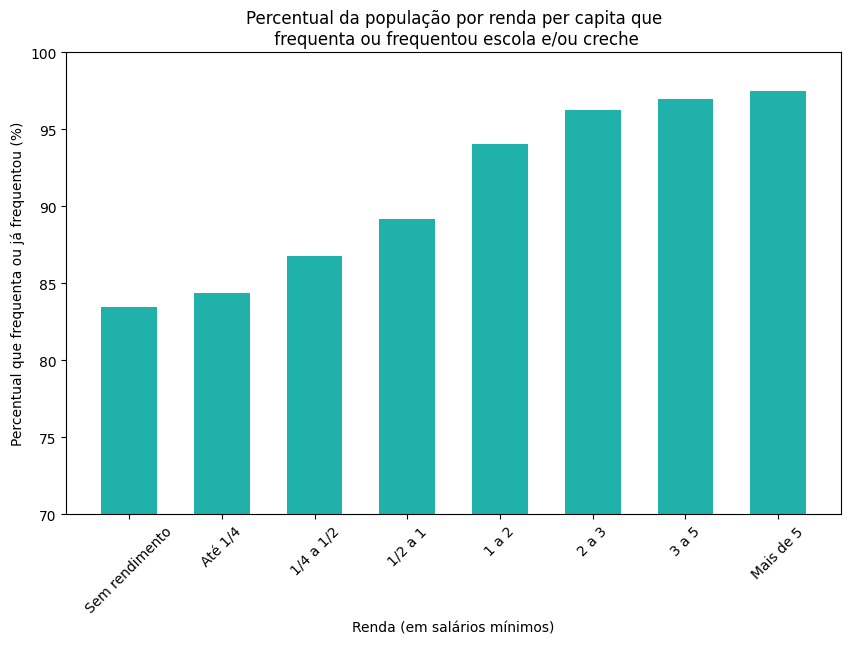

In [70]:
rotulos_x_renda = "Sem rendimento", "Até 1/4", "1/4 a 1/2", "1/2 a 1", "1 a 2", "2 a 3", "3 a 5", "Mais de 5"

renda_total = [tab3.iloc[0:12, x] for x in range(2, 10)]
renda_freq = [tab3.iloc[13:25, x] for x in range(2, 10)]
renda_jafreq = [tab3.iloc[26:38, x] for x in range(2, 10)]
renda_nfreq = [tab3.iloc[39:51, x] for x in range(2, 10)]

largura_barra = 0.6
lista_freq = [sum(np.add(renda_freq, renda_jafreq)[x]) / sum(renda_total[x]) * 100 for x in range(8)]
indices_renda = list(range(len(lista_freq)))

# Plota barras
plt.figure(figsize=(10, 6))
plt.bar(indices_renda, lista_freq, largura_barra, color='lightseagreen', label='Total H')

# Define rótulos do gráfico
plt.xlabel('Renda (em salários mínimos)')
plt.ylabel('Percentual que frequenta ou já frequentou (%)')
plt.title('Percentual da população por renda per capita que\n frequenta ou frequentou escola e/ou creche')
plt.ylim([70,100])
plt.xticks(indices_renda, rotulos_x_renda, rotation=45)

plt.show()

A partir deste gráfico, verifica-se uma relação quase diretamente proporcional entre o nível de renda e o percentual da população com acesso ao ambiente escolar, indicando o forte impacto das condições monetárias sobre o acesso à escola.

#### Correlação entre população que frequenta ou já frequentou a escola e renda

Já forma a avaliar a correlação, foi construído um grafico linear com os pontos acima destacados, de forma a visualizar e avaliar a relação entre os dados. Em laranja, destaca-se a regressão linear dos, e na legenda abaixo, o coeficiente de correlação de pearson.

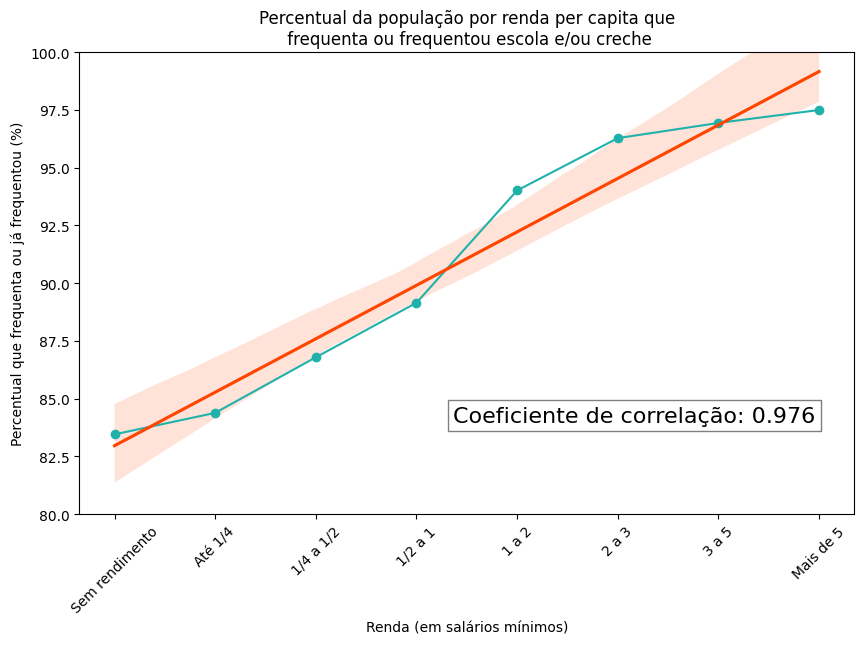

In [71]:
datas = pd.DataFrame(np.array([lista_freq,indices_renda]).T, columns=['porcentagem', 'renda'])
correlation = datas.corr()

# Preapara para plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(indices_renda, lista_freq, marker='o', linestyle='-', color='lightseagreen', label='Total H')

plt.text(0.95, 0.2, f'Coeficiente de correlação: {correlation.iloc[0,1]:.3f}', transform=plt.gca().transAxes, 
         ha='right', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'), fontsize=16)

sns.regplot(data=datas, x='renda', y='porcentagem', scatter_kws={'s': 0}, line_kws={'color': 'orangered'})

# Define rótulos do gráfico
plt.xlabel('Renda (em salários mínimos)')
plt.ylabel('Percentual que frequenta ou já frequentou (%)')
plt.title('Percentual da população por renda per capita que\n frequenta ou frequentou escola e/ou creche')
plt.ylim([80,100])
plt.xticks(indices_renda, rotulos_x_renda, rotation=45)

plt.show()

A partir dos dados aqui visualizados e do coeficiente de correlação calculado, afirma-se que, de fato, há uma interdependência notável entre a renda e a frequência escolar. Tal fato confirma o já esperado, dado o contexto social brasileiro.

## Análise de Regressão

Nesta seção, é construído um modelo de regressão do percentual de população que frequenta ou já frequentou a escola em função da renda e da região brasileira. Para tal, emprega-se o méodo OLS (Ordinary Least Squares) para aproximar o modelo.

Abaixo, prepara-se o modelo abaixo do percentual populacional em função da renda como variável quantitativa e da região como variável qualitativa.

In [72]:
renda_total = np.array(pd.DataFrame([tab3_reg[x].iloc[0, 2:10] for x in range(5)]))
renda_freq = np.array(pd.DataFrame([tab3_reg[x].iloc[13, 2:10] for x in range(5)]))
renda_jafreq = np.array(pd.DataFrame([tab3_reg[x].iloc[26, 2:10] for x in range(5)]))

perc_freq = np.divide(np.add(renda_freq, renda_jafreq), renda_total)
rendas = [0.125,0.375,0.75,1.5,2.5,4,5,0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centroeste']
lista = []

for i in range(8):
    for j in range(5):
        lista.append([perc_freq[j][i],rendas[i],regioes[j]])

# Código usando statsmodels
datas = pd.DataFrame(np.array(lista), columns=['porcentagem', 'renda', 'regiao'])
datas['porcentagem'] = pd.to_numeric(datas['porcentagem'])
datas['renda'] = pd.to_numeric(datas['renda'])

model = ols('porcentagem ~ renda + C(regiao)', data=datas).fit()
print(str(model.summary()))

                            OLS Regression Results                            
Dep. Variable:            porcentagem   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     23.24
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           4.40e-10
Time:                        09:55:14   Log-Likelihood:                 85.701
No. Observations:                  40   AIC:                            -159.4
Df Residuals:                      34   BIC:                            -149.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.84

A partir dos dados do modelo, vê-se que o coeficiente $R^2$ situa-se razoavelmente próximo de 1, indicando que este constitui uma boa aproximação. Observe que a tabela fornece-nos também o valor de cada coeficiente e seu erro. Note que a variável correspondente à região centro-oeste tornou-se a intersecção com o eixo y, servindo como base para as demais variáveis.

Para obter mais informações sobre o modelo, abaixo foram contruídos gráficos relacionando os parâmetros ajustados e seus residuais, e também os quantis amostrados e teóricos.

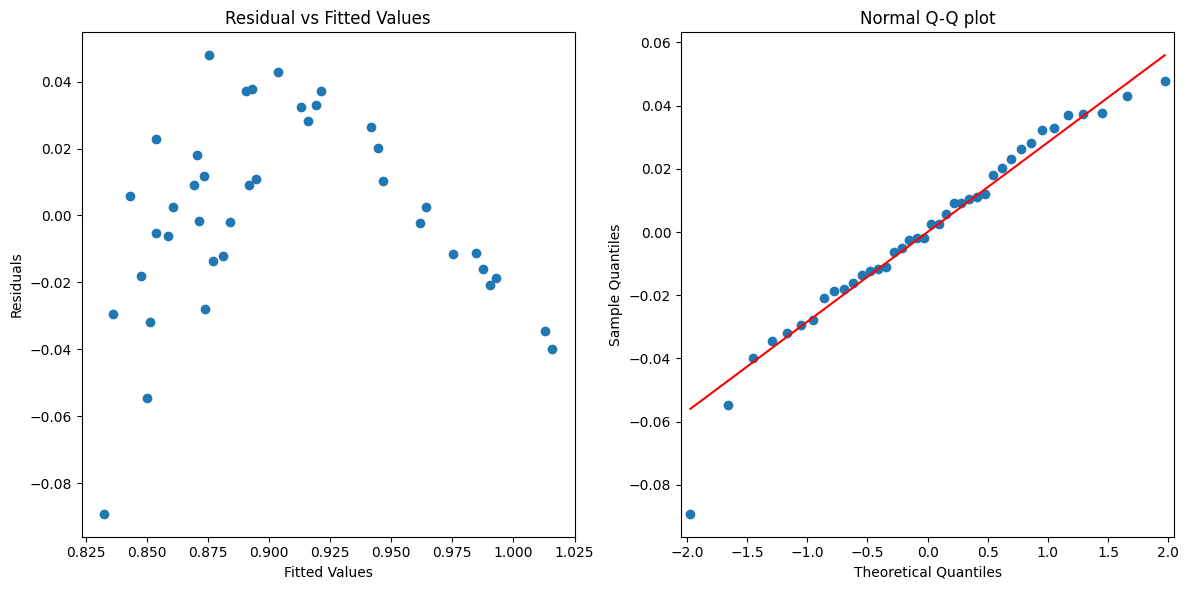

In [73]:
res = model.resid # residuals
fitted = model.fittedvalues # fitted values
resn = model.resid_pearson # normalized residuals
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 2)
sm.graphics.qqplot(res, line='s',ax=ax)
ax.set_title('Normal Q-Q plot')

ax = fig.add_subplot(1, 2, 1)
ax.scatter(fitted, res)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual vs Fitted Values')

fig.tight_layout()

plt.show()

A partir do gráfico Q-Q normal, vê-se que os pontos aproximam uma reta, indicando a normalidade dos erros e, consequentemente, que tal suposição está correta.

Por outro lado, o gráfico de resíduos por parâmetro ajustado mostra uma distribuição aleatória dos erros ao redor da linha de resíduo 0, mas com um padrão podendo ser identidicado na região central ao redor de $\approx 0.925$, em que a distribuição deixa de ser aleatória e se concentra acima da linha. Nessa faixa, vê-se que o valor real encontra-se geralmente acima do previsto, portanto.

## Análise Anova

Para a Análise Anova, será avaliada a influência de diferentes regiões brasileiras sobre a escolaridade, através do modelo gerado na última seção. Portanto, abaixo gera-se a tabela Anova.

In [74]:
print(sm.stats.anova_lm(model, typ=1))

             df    sum_sq   mean_sq           F        PR(>F)
C(regiao)   4.0  0.009249  0.002312    2.437336  6.588903e-02
renda       1.0  0.100992  0.100992  106.455136  5.204983e-12
Residual   34.0  0.032255  0.000949         NaN           NaN


A partir da tabela e adotando-se $\alpha = 0.05$, vê-se que a variável de renda tem sua hipótese nula negada, ou seja, ela é relevante no cálculo da escolaridade e leva a um diferença de médias. Por outro lado, vê-se que para a variável de região a hipótese nula é verdadeira, mostrando que esta não leva a uma diferença de médias para a significância adotada.

Para complementar a análise, aplica-se também o Teste de Tukey sobre a variável de região, comprovando novamente a baixa influência da região sobre a escolaridade.

In [75]:
hs_res = sm.stats.multicomp.pairwise_tukeyhsd(datas['porcentagem'], datas['regiao'])
print(hs_res)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Centroeste Nordeste   0.0023    1.0 -0.0864  0.091  False
Centroeste    Norte  -0.0153 0.9873  -0.104 0.0734  False
Centroeste  Sudeste   0.0255 0.9202 -0.0632 0.1142  False
Centroeste      Sul   0.0226  0.947  -0.066 0.1113  False
  Nordeste    Norte  -0.0175 0.9788 -0.1062 0.0712  False
  Nordeste  Sudeste   0.0233 0.9418 -0.0654  0.112  False
  Nordeste      Sul   0.0204 0.9635 -0.0683 0.1091  False
     Norte  Sudeste   0.0408 0.6791 -0.0479 0.1295  False
     Norte      Sul   0.0379 0.7346 -0.0508 0.1266  False
   Sudeste      Sul  -0.0029    1.0 -0.0916 0.0858  False
---------------------------------------------------------


O Teste de Tukey mostra-nos que todos os pares de variáveis tem sua Hipótese Nula não rejeitada, de forma que a a diferença entre as médias de escolaridade entre duas regiões brasileiras quaisquer não são significativas.

## Teste Qui-Quadrado

Nesta análise, utilizamos o teste qui-quadrado de independência para investigar a relação entre a frequência de pessoas que frequentam ou já frequentaram a escola e duas variáveis independentes: a renda familiar e a região geográfica. 

* Hipótese nula (H0): A distribuição da frequência de pessoas que frequentam ou já frequentaram a escola não varia significativamente entre as diferentes regiões dada uma determinada renda familiar. Em outras palavras, a proporção de pessoas que frequentam a escola é independente da região dentro de determinado grupo socioeconômico.

* Hipótese alternativa (H1): A distribuição da frequência de pessoas que frequentam ou já frequentaram a escola varia conforme a categoria de renda dentro de cada região geográfica. Ou seja, há uma associação significativa entre a renda familiar e a proporção de pessoas que frequentam a escola dentro de cada região.

A tabela observada apresenta as frequências reais de pessoas em diferentes categorias de renda e regiões, permitindo-nos comparar esses dados com as frequências esperadas sob a hipótese nula.

In [86]:
# organizar os dados como tabela observada
tabela_obs = datas.pivot_table(index='renda', columns='regiao', values='porcentagem')
print(tabela_obs)

regiao  Centroeste  Nordeste     Norte   Sudeste       Sul
renda                                                     
0.000     0.829848  0.795436  0.743348  0.885250  0.888557
0.125     0.819509  0.848526  0.806695  0.863387  0.846113
0.375     0.852299  0.863393  0.849074  0.882249  0.868906
0.750     0.878339  0.869694  0.876891  0.905751  0.900943
1.500     0.927774  0.930688  0.923231  0.944387  0.945633
2.500     0.952119  0.958729  0.946881  0.964815  0.968079
4.000     0.959515  0.966594  0.957015  0.971300  0.973470
5.000     0.969509  0.974035  0.963581  0.976094  0.978404


In [93]:
#significancia
nivel_significancia = 0.05

# qui-quadrado
chi2, p_valor, graus_lib, esperados = chi2_contingency(tabela_obs)

dados = [["Qui-quadrado", chi2], ["P-valor", p_valor], ["Graus de liberdade", graus_lib]]
print(tabulate(dados, headers=["Resultados do teste", "Valores"], tablefmt="fancy_grid"))

print("\nFrequências esperadas:")
print(pd.DataFrame(esperados, index=tabela_obs.index, columns=tabela_obs.columns))

# testando a significância
if p_valor < nivel_significancia:
    print(f"\nComo o valor de p {p_valor} é menor que o nível de significância {nivel_significancia}, rejeitamos a hipótese nula.")
else:
    print(f"\nComo o valor de p {p_valor} não é menor que o nível de significância {nivel_significancia}, não rejeitamos a hipótese nula.")

╒═══════════════════════╤════════════╕
│ Resultados do teste   │    Valores │
╞═══════════════════════╪════════════╡
│ Qui-quadrado          │  0.0138083 │
├───────────────────────┼────────────┤
│ P-valor               │  1         │
├───────────────────────┼────────────┤
│ Graus de liberdade    │ 28         │
╘═══════════════════════╧════════════╛

Frequências esperadas:
regiao  Centroeste  Nordeste     Norte   Sudeste       Sul
renda                                                     
0.000     0.822050  0.824129  0.808077  0.845414  0.842769
0.125     0.830343  0.832443  0.816229  0.853943  0.851272
0.375     0.856477  0.858643  0.841919  0.880819  0.878064
0.750     0.879436  0.881661  0.864488  0.904431  0.901602
1.500     0.927082  0.929427  0.911324  0.953431  0.950449
2.500     0.950679  0.953084  0.934520  0.977699  0.974641
4.000     0.958076  0.960499  0.941790  0.985306  0.982224
5.000     0.964769  0.967209  0.948370  0.992189  0.989086

Como o valor de p 1.0 não é menor 

* Qui-quadrado observado: O valor de 0.0138 indica que não há uma diferença significativa entre as frequências observadas e as frequências esperadas. Isso sugere que não há evidências suficientes para rejeitar a hipótese nula.

* P-valor: O p-valor é 1.0, o que significa que é muito maior que o nível de significância padrão de 0.05. Isso confirma que não há evidências estatisticamente significativas para rejeitar a hipótese nula.

* Frequências esperadas: As frequências esperadas mostram o que seria esperado se não houvesse associação entre escolaridade e região. Os valores observados estão próximos dos valores esperados, o que reforça a conclusão de que não há uma associação significativa.

# Conclusão

Com base nas análises estatísticas realizadas, foi possível obter diversas informações de alta relevância acerca do panorama educacional brasileiro. Os dados revelam padrões significativos e tendências que podem informar políticas educacionais e estratégias de intervenção. A exemplo, discerniu-se durante as análises realizadas que renda apresenta uma correlação considerável com o acesso ao ambiente escolar, mostrando-se um fator de grande relevância na universalização do ensino. Ademais, vê-se a influência do grupo étnico ao qual o cidadão pertence sobre os indíces de evasão escolar, permitindo a formulação de políticas direcionadas para sua prevenção.

A compreensão detalhada desses dados permite identificar áreas críticas que necessitam de melhorias, bem como pontos fortes que podem ser fortalecidos. Em suma, este estudo contribui para uma visão mais abrangente e fundamentada do cenário educacional no Brasil, oferecendo subsídios valiosos para tomadas de decisão que visam aprimorar a qualidade da educação no país.

# Referências

[1] IBGE. Censo demográfico : 2010 : educação e deslocamento : resultados da amostra, 2010. Disponível em: https://biblioteca.ibge.gov.br/index.php/biblioteca-catalogo?view=detalhes&id=7545. Acesso em: 12 de maio de 2024.

[2] BUSSAB, Wilson de O.; MORETTIN, Pedro A. Estatística básica. 5a-edição, Ed. Saraiva, S. P, 2003.

[3] OLIVEIRA, Luiz Antonio Pinto de; SIMÕES, Celso Cardoso da Silva. O IBGE e as pesquisas populacionais. Revista Brasileira de Estudos de População, v. 22, p. 291-302, 2005.